# Pymaceuticals Inc.
---

### Analysis

- Out of the 4 druge regimens used, Capomulin and Ramicane have the most number of occurance, Capomulin and Remicane are the two most best treatments to reduce mice tumor volume. 
- 248 mice that were fairly equal in Male and Female were used.
- There is a positive corelation between weight and tumor volume of the mice 
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [79]:
# Checking the number of mice.
number_of_mice = len(combined_data['Mouse ID'].unique())
number_of_mice 

249

In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID.
duplicat_mouse_ID_data= combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicat_mouse_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_duplicates_in_combined_data = combined_data.loc[combined_data['Mouse ID'] != "g989"].copy()
dropped_duplicates_in_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(dropped_duplicates_in_combined_data['Mouse ID'].unique())
number_of_mice

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = dropped_duplicates_in_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = dropped_duplicates_in_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = dropped_duplicates_in_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = dropped_duplicates_in_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = dropped_duplicates_in_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
dictionary=({'Mean Tumor Volume': tumor_volume_mean,
'Median Tumor Volume': tumor_volume_median,
'Tumor Volume Variance': tumor_volume_variance,
'Tumor Volume Std. Dev.': tumor_volume_std_dev,
'Tumor Volume Std. Err.': tumor_volume_sem
})
summary_statistics= pd.DataFrame(dictionary)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_summary_statistics=dropped_duplicates_in_combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean",
                                            "median", "var", "std", "sem"]})
new_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

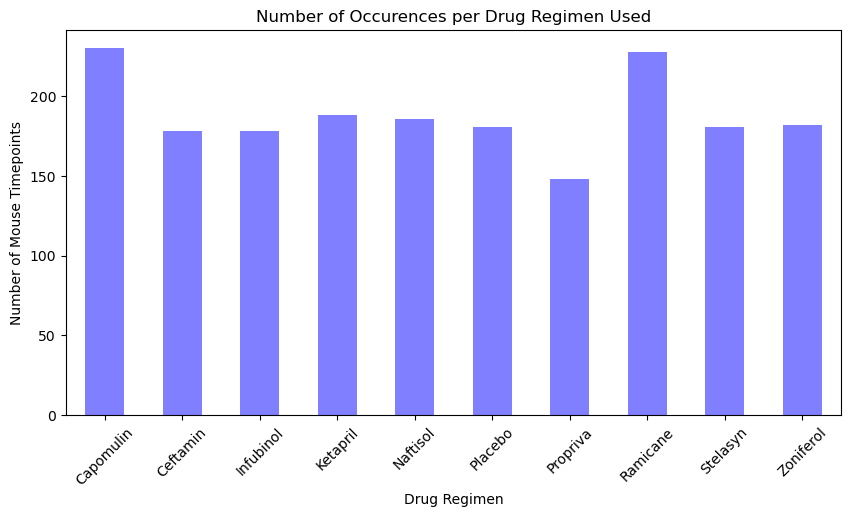

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_size = dropped_duplicates_in_combined_data.groupby("Drug Regimen").size()
drug_regimen_size.plot(kind='bar', color='b', figsize=(10, 5), alpha=0.5)
plt.ylabel('Number of Mouse Timepoints')
plt.title('Number of Occurences per Drug Regimen Used')
plt.xticks(rotation=45)
plt.show()

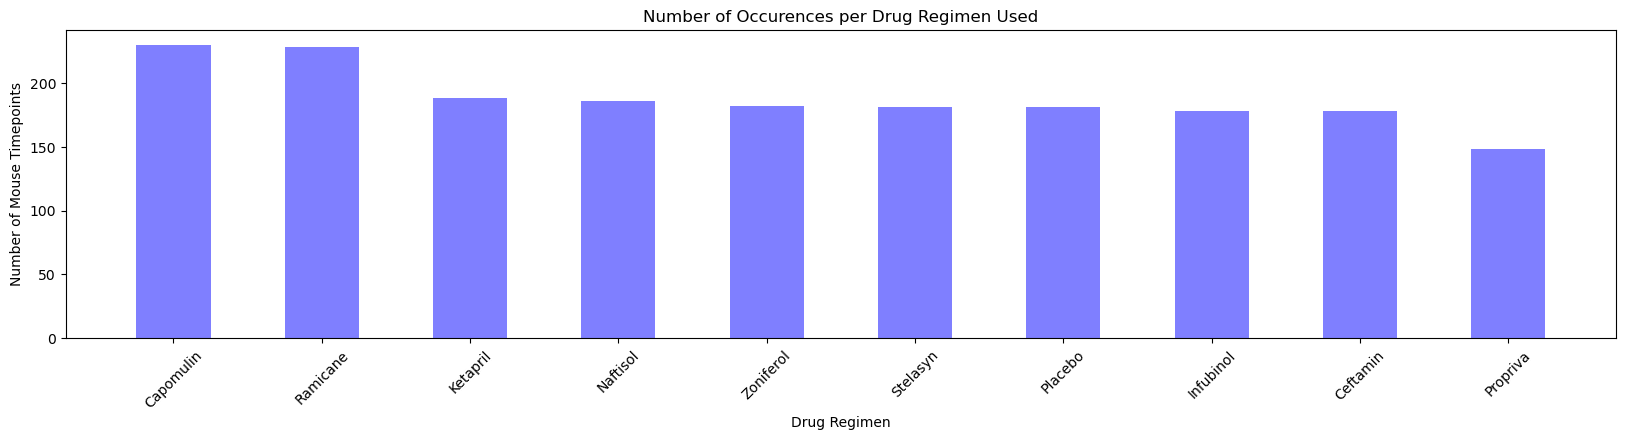

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = dropped_duplicates_in_combined_data['Drug Regimen'].value_counts()
yaxis = drug_regimen_counts.values
xaxis = drug_regimen_counts.index.values
plt.figure(figsize=(20,4))
plt.title('Number of Occurences per Drug Regimen Used')
plt.ylabel('Number of Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.bar(xaxis, yaxis, bottom=None, align='center', color='b', alpha=0.5, width=0.5) 
plt.show()

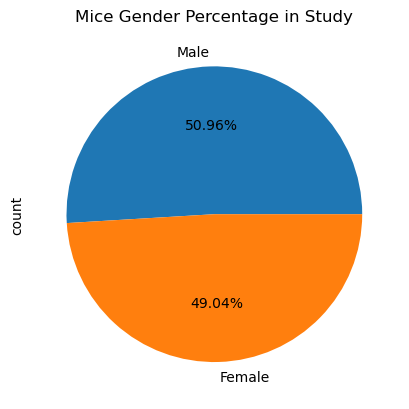

In [88]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_count = dropped_duplicates_in_combined_data['Sex'].value_counts()

# Make the pie chart
mice_gender_count.plot(kind="pie", autopct='%1.2f%%', title= 'Mice Gender Percentage in Study')
plt.show()

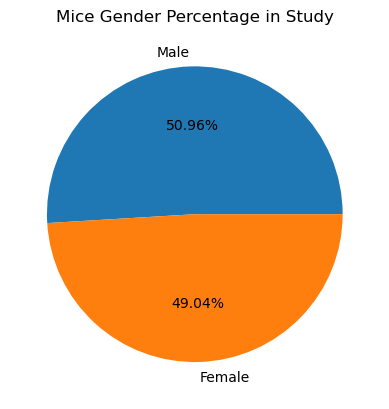

In [89]:

y = mice_gender_count.values
labels = mice_gender_count.index.values
plt.pie(y, labels = labels, autopct='%1.2f%%')
plt.title("Mice Gender Percentage in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
dropped_duplicates_in_combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = dropped_duplicates_in_combined_data.groupby("Mouse ID")["Tumor Volume (mm3)"].agg("last")

In [92]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Let ftv represent Final Tumor Volume
df_ftv = pd.merge(mouse_metadata, final_tumor_vol, how="left", on="Mouse ID")
df_ftv1 = df_ftv[
    (df_ftv["Drug Regimen"] == "Capomulin") |
    (df_ftv["Drug Regimen"] == "Ramicane") |
    (df_ftv["Drug Regimen"] == "Infubinol") |
    (df_ftv["Drug Regimen"] == "Ceftamin")]
df_ftv2 = df_ftv1.rename(columns={"Tumor Volume (mm3)" : "Final Tumor Volume (mm3)"}).reset_index(drop=True)
df_ftv2.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,22.050126
1,s185,Capomulin,Female,3,17,23.343598
2,x401,Capomulin,Female,16,15,28.484033
3,m601,Capomulin,Male,22,17,28.430964
4,g791,Ramicane,Male,11,16,29.128472


In [93]:
df_ftv2_filtered= df_ftv2[df_ftv2['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
df_ftv2_filtered.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,22.050126
1,s185,Capomulin,Female,3,17,23.343598
2,x401,Capomulin,Female,16,15,28.484033
3,m601,Capomulin,Male,22,17,28.430964
4,g791,Ramicane,Male,11,16,29.128472


In [94]:
# Define the list of treatments for iteration and later use in plots
selected_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Initialize an empty list to collect tumor volume data for plotting
tumor_volumes = []
# Loop through each drug regimen to calculate the IQR and identify potential outliers
for regimen in selected_drugs:
    # Filter the data to get tumor volumes for the current drug regimen
    tumor_data = df_ftv2.loc[df_ftv2["Drug Regimen"] == regimen, 'Final Tumor Volume (mm3)']
    # Add the filtered tumor volume data to the list
    tumor_volumes.append(tumor_data)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    q_values = tumor_data.quantile([.25, .5, .75])
    q1 = q_values[0.25]
    q3 = q_values[0.75]
    iqr = q3 - q1
    # Determine outliers using upper and lower bounds
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    outlier_data = tumor_data.loc[(tumor_data < lower_limit) | (tumor_data > upper_limit)]
    print(f"Potential outliers for {regimen}: {outlier_data}")

Potential outliers for Capomulin: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 58    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


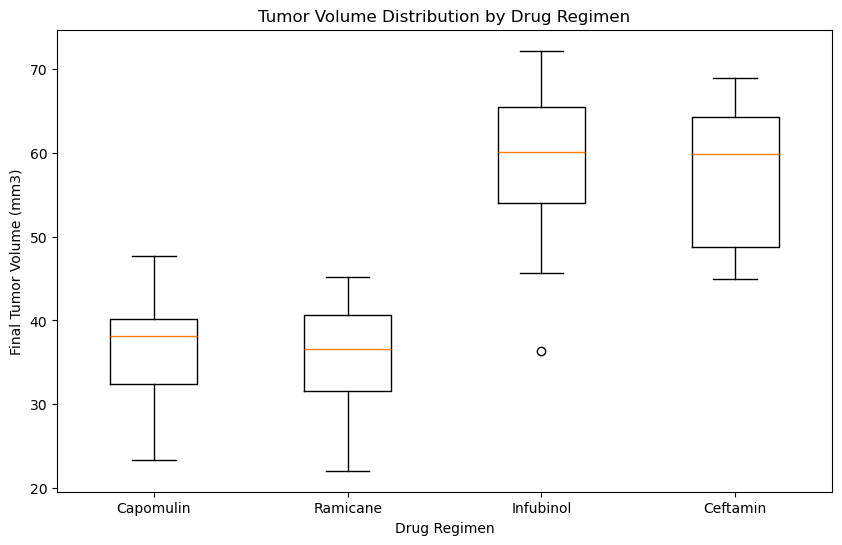

In [95]:
# Create a box plot using matplotlib
plt.figure(figsize=(10, 6))

# Prepare data for box plot
data_to_plot = [df_ftv2_filtered[df_ftv2_filtered["Drug Regimen"] == drug]["Final Tumor Volume (mm3)"] for drug in selected_drugs]

plt.boxplot(data_to_plot, labels=selected_drugs)

# Add titles and labels
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

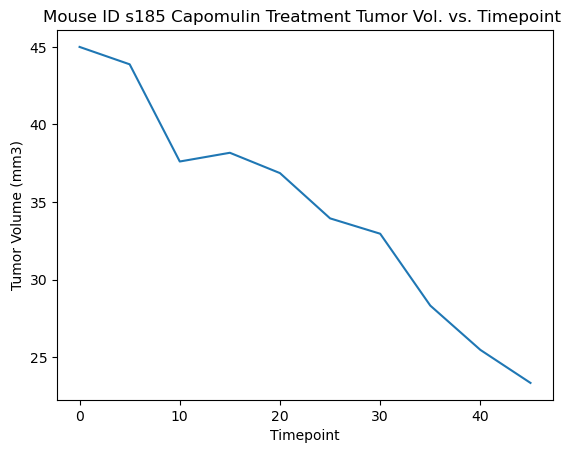

In [96]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ID_s185	=  dropped_duplicates_in_combined_data[dropped_duplicates_in_combined_data["Mouse ID"] == "s185"]
ID_s185_timepoint = ID_s185["Timepoint"]
ID_s185_tvol = ID_s185["Tumor Volume (mm3)"]
plt.plot(ID_s185_timepoint, ID_s185_tvol)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID s185 Capomulin Treatment Tumor Vol. vs. Timepoint ")
plt.show()

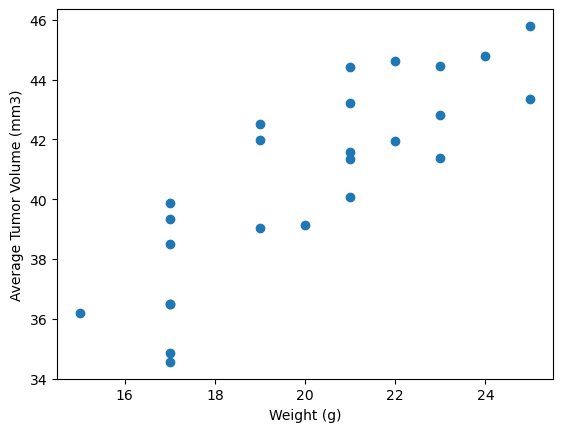

In [97]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = dropped_duplicates_in_combined_data[dropped_duplicates_in_combined_data["Drug Regimen"] == "Capomulin"]
cap_average = cap.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
cap_weight = cap_average["Weight (g)"]
cap_data = cap_average["Tumor Volume (mm3)"]
plt.scatter(cap_weight,cap_data)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

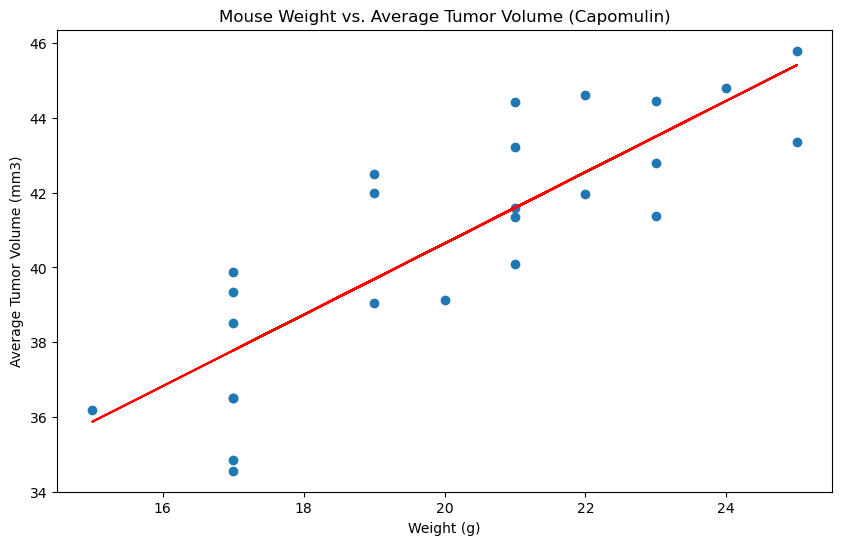

In [98]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(cap_weight, cap_data)
regression_line = slope * cap_weight + intercept

plt.figure(figsize=(10, 6))
plt.scatter(cap_weight, cap_data, label='Data Points')
plt.plot(cap_weight, regression_line, color='red', label='Fit Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
